# Naive Bayes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("heart.csv")

# Mostrar primeras filas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


A continuación se presenta la descripción de cada columna:

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]



---



### Análisis exploratorio



---



In [4]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [5]:
# Estadísticas descriptivas
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


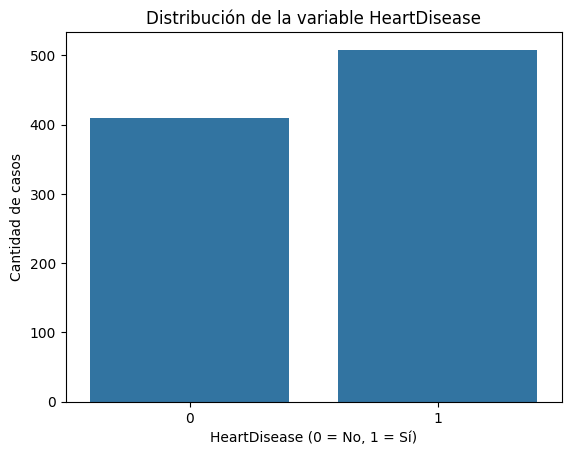

In [6]:
# Ver distribución de la variable objetivo
sns.countplot(x="HeartDisease", data=df)
plt.title("Distribución de la variable HeartDisease")
plt.xlabel("HeartDisease (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de casos")
plt.show()

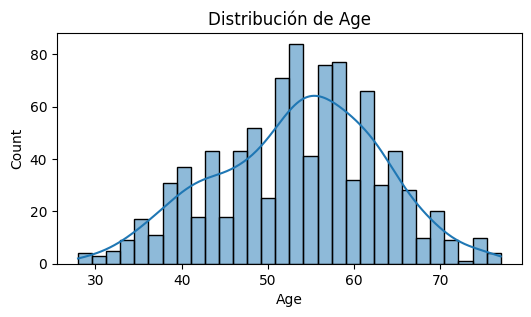

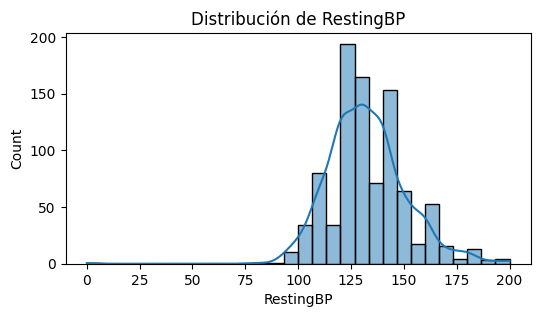

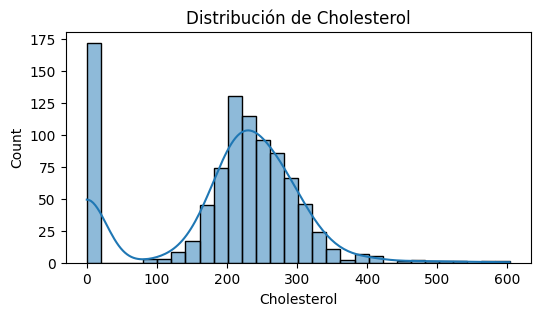

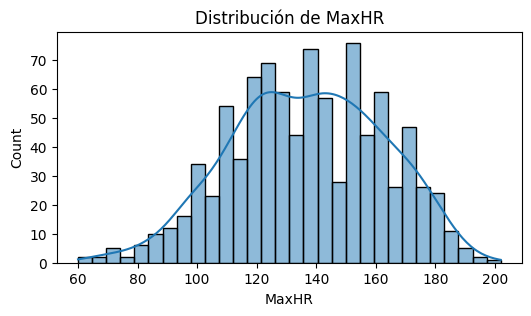

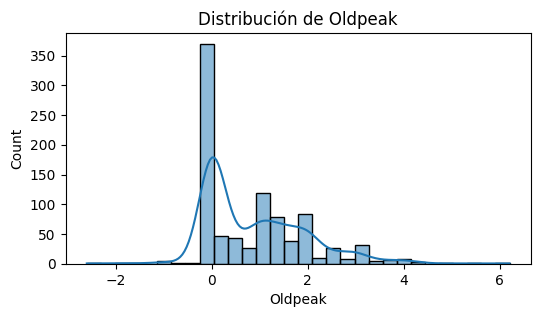

In [7]:
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for var in num_vars:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")
    plt.show()

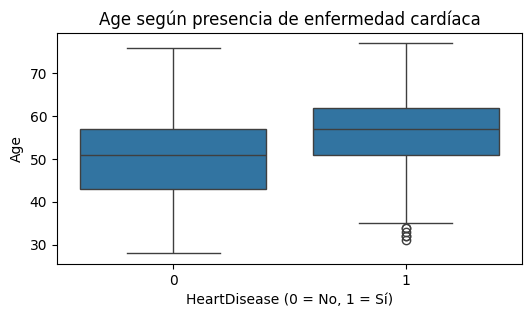

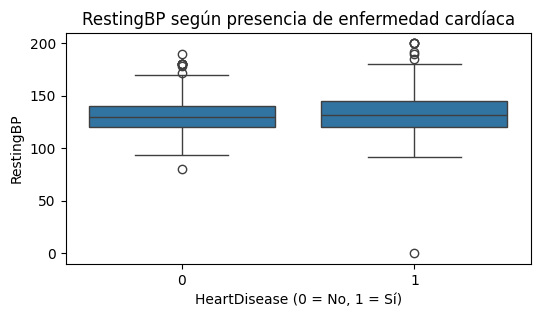

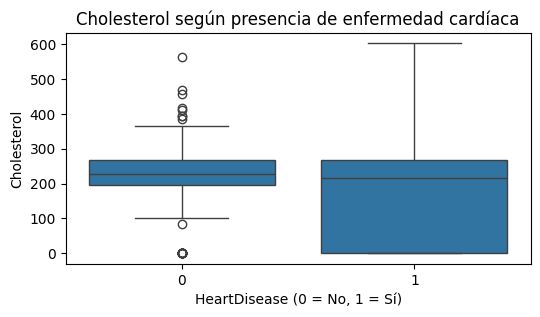

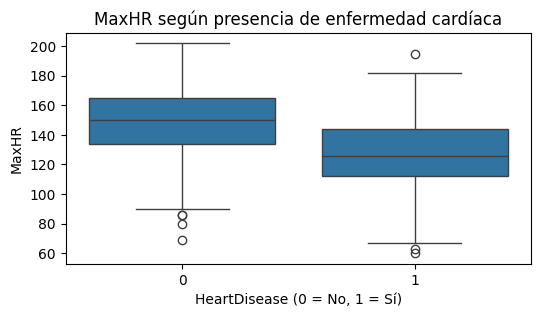

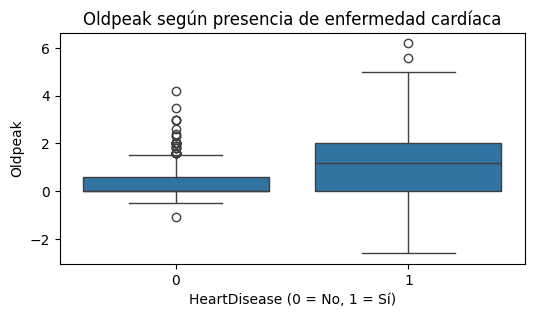

In [8]:
# Variables numéricas según enfermedad cardíaca
for var in num_vars:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x='HeartDisease', y=var)
    plt.title(f"{var} según presencia de enfermedad cardíaca")
    plt.xlabel("HeartDisease (0 = No, 1 = Sí)")
    plt.show()

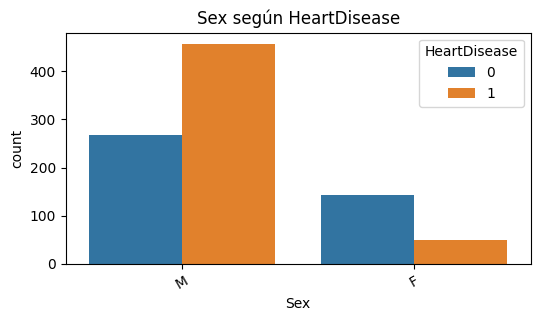

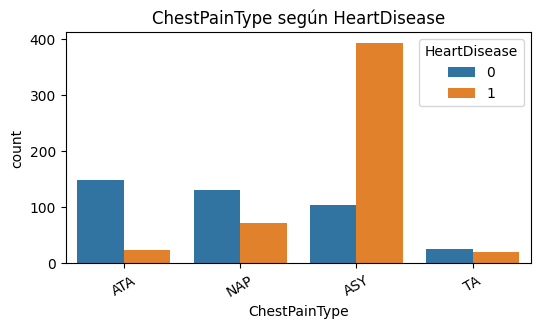

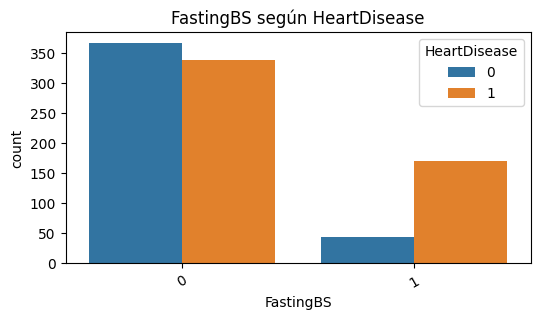

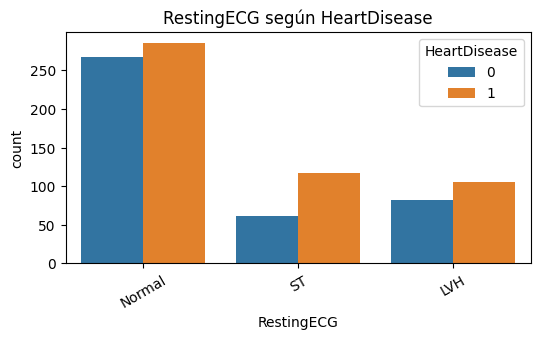

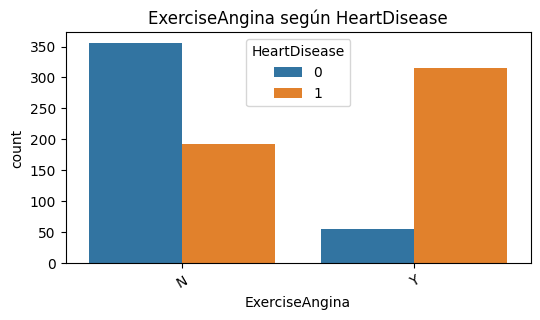

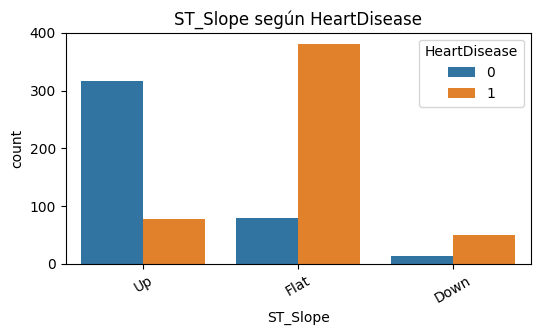

In [9]:
# Variables categóricas según HeartDisease
cat_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for var in cat_vars:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=var, hue='HeartDisease')
    plt.title(f"{var} según HeartDisease")
    plt.xticks(rotation=30)
    plt.show()

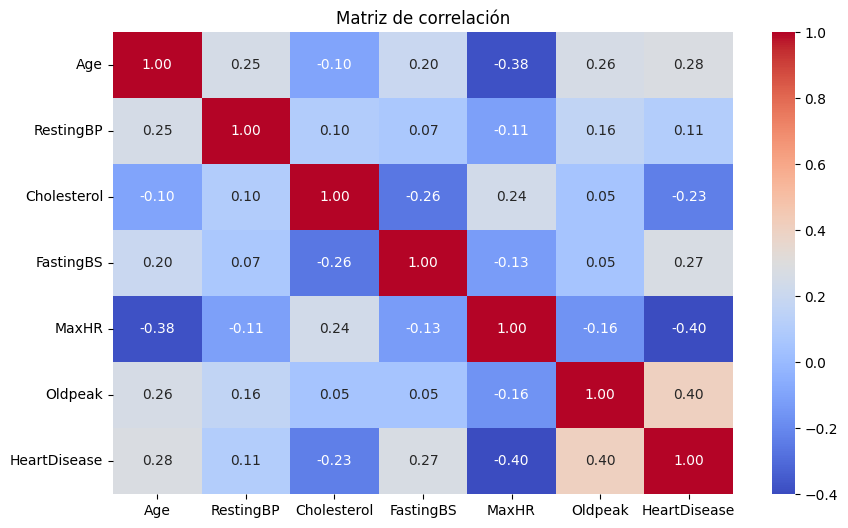

In [10]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()



---
### Procesamiento de variables


---




In [11]:
# Copiar el dataframe
data = df.copy()

# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separar variables predictoras y variable objetivo
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']



---
### Modelado


---




In [12]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Inicializar y entrenar el modelo
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



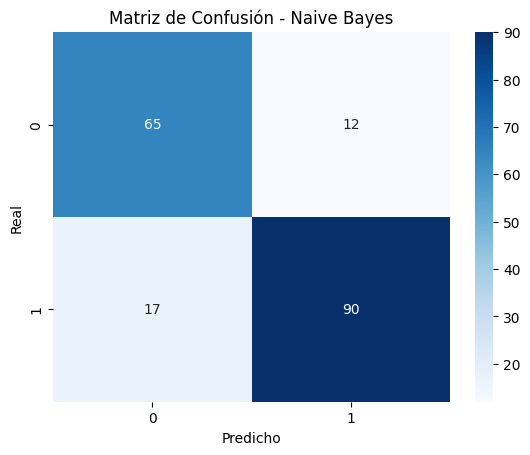

In [14]:
# Reporte de métricas
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Gráfico de matriz
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()



---
### Comparación con otros modelos


---




In [15]:

# Inicializar modelos
model_nb = GaussianNB()
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar modelos
model_nb.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)
model_lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_nb = model_nb.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_lr = model_lr.predict(X_test_scaled)

In [16]:
# Obtener reportes de clasificación
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Crear dataframe comparativo
import pandas as pd

comparison_df = pd.DataFrame({
    "Naive Bayes": {
        "Accuracy": report_nb["accuracy"],
        "Precision": report_nb["1"]["precision"],
        "Recall": report_nb["1"]["recall"],
        "F1-Score": report_nb["1"]["f1-score"]
    },
    "Random Forest": {
        "Accuracy": report_rf["accuracy"],
        "Precision": report_rf["1"]["precision"],
        "Recall": report_rf["1"]["recall"],
        "F1-Score": report_rf["1"]["f1-score"]
    },
    "Logistic Regression": {
        "Accuracy": report_lr["accuracy"],
        "Precision": report_lr["1"]["precision"],
        "Recall": report_lr["1"]["recall"],
        "F1-Score": report_lr["1"]["f1-score"]
    }
}).T

# Mostrar resultados
print(comparison_df)


                     Accuracy  Precision    Recall  F1-Score
Naive Bayes          0.842391   0.882353  0.841121  0.861244
Random Forest        0.880435   0.897196  0.897196  0.897196
Logistic Regression  0.847826   0.907216  0.822430  0.862745


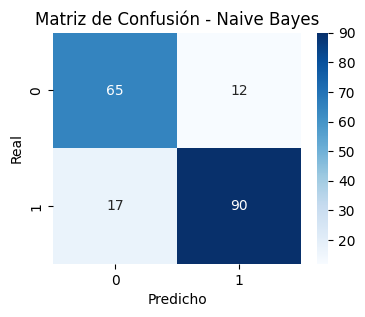

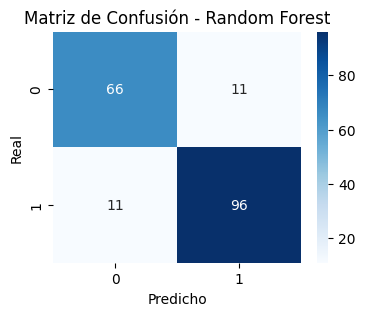

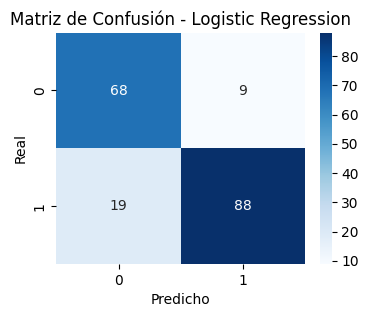

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr
}

for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()




---



### Cross Validation


In [18]:
# Evaluar con validación cruzada
scores_nb = cross_val_score(GaussianNB(), X, y, cv=5, scoring='accuracy')
scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='accuracy')
scores_lr = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print("Accuracy por fold - Naive Bayes:", scores_nb)
print("Accuracy por fold - Random Forest:", scores_rf)
print("Accuracy por fold - Logistic Regression:", scores_lr)

# Tabla resumen
cv_results = pd.DataFrame({
    'Modelo': ['Naive Bayes', 'Random Forest', 'Logistic Regression'],
    'Accuracy Promedio': [scores_nb.mean(), scores_rf.mean(), scores_lr.mean()],
    'Desviación Estándar': [scores_nb.std(), scores_rf.std(), scores_lr.std()]
})

print("\nResumen comparativo con validación cruzada:")
print(cv_results)

Accuracy por fold - Naive Bayes: [0.83152174 0.9076087  0.79891304 0.8579235  0.75956284]
Accuracy por fold - Random Forest: [0.875      0.83695652 0.82608696 0.81967213 0.75409836]
Accuracy por fold - Logistic Regression: [0.82065217 0.81521739 0.82065217 0.81420765 0.76502732]

Resumen comparativo con validación cruzada:
                Modelo  Accuracy Promedio  Desviación Estándar
0          Naive Bayes           0.831106             0.050452
1        Random Forest           0.822363             0.039153
2  Logistic Regression           0.807151             0.021231
